
####  **Matplotlib**

- **What it is**: A **low-level plotting library** for creating static, animated, and interactive visualizations in Python.
- **Use cases**: Great for **custom and detailed plots** like line plots, bar charts, histograms, scatter plots, etc.
- **Flexibility**: Gives you **full control** over every part of a plot (axes, labels, ticks, etc.).
- **Basic Syntax Example**:


#### **Seaborn**

- **What it is**: A **high-level data visualization library** built on top of Matplotlib.
- **Use cases**: Ideal for **statistical graphics** and **working directly with DataFrames** (like from pandas).
- **Style**: Creates **beautiful and informative plots** with minimal code.
- **Built-in themes**: Automatically applies color palettes and styles.

#### Summary:

| Feature        | Matplotlib                 | Seaborn                           |
|----------------|-----------------------------|------------------------------------|
| Level          | Low-level                   | High-level                         |
| Customization  | Very detailed               | Somewhat simplified                |
| Syntax         | Verbose                     | Concise                            |
| Integration    | Standalone                  | Works best with pandas DataFrames  |
| Style          | Basic by default            | Polished and attractive by default |


In [35]:
%matplotlib inline

# it tells jupyter to: 
    # display plots directly below the code cells.
    # keep the plots embedded inside the notebook.
    # automatically render matplotlib plots when you use plt.plot(), plt.show(), etc, without opening a separate window.

# other %matplotlib options:
    # %matplotlib notebook - allows interactive plots (zoom, pan)
    # %matplotlib qt - opens plots in a new window using Qt

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

[0 1 2 3 4 5 6 7 8 9]


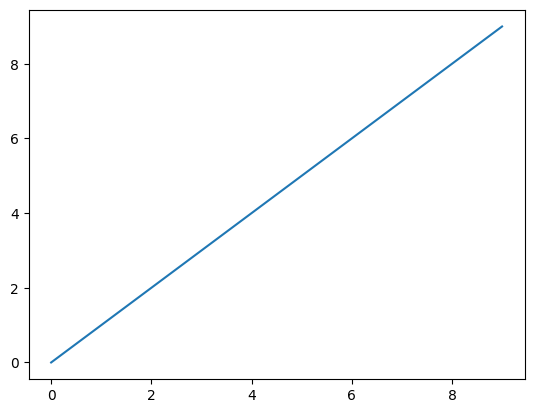

In [36]:
# creating a simple plot
data = np.arange(10)
print(data)

plt.plot(data)  # simple line plot

In [37]:
# libraries like seaborn and pandas built-in plotting functions will deal with many of the mundane details of making plots, should we wish to customize them beyond the function options provided, we will need to learn a bit about the matplotlib API.

# we will only read enough basics for simple tasks

## [ Figures and Subplots ]
- Plots in matplotlib reside within a Figure object.
- we can create a new figure with `plt.figure`
- In IPython, if you first run `%matplotlib` to set up the matplotlib integration, an empty plot window will appear, but in Jupyter nothing will be shown until we use a few more commands


In [38]:
fig = plt.figure()
# plt.figure() has a number of options: 
# figsize will guarantee the figure has a certain size and aspect ratio if saved to disk
fig = plt.figure(figsize=(2,2))

<Figure size 640x480 with 0 Axes>

<Figure size 200x200 with 0 Axes>

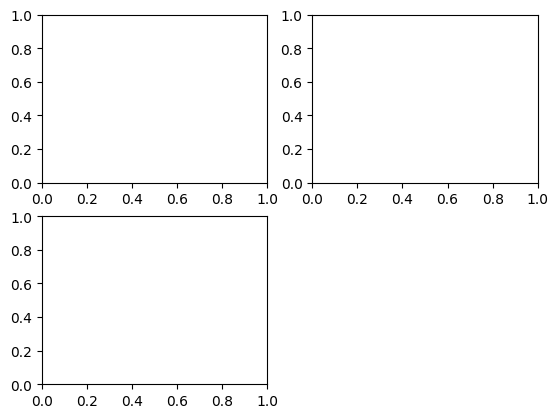

In [39]:
# we can't make a plot with a blank figure.
# have to create one or more subplots by using `add_subplot`
# syntax: fig.add_subplot(nrows, ncols, index)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

# one nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so you must put all of the plotting commands in a single notebook cell

In Matplotlib, you can create plots using **two approaches**:

#### 1. **Top-level (State-based) Approach** — using `plt.plot()`:
This is the **quick and easy** way.

```python
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Simple Plot")
plt.show()
```

- Good for small scripts or quick plotting.
- Behind the scenes, Matplotlib creates **figure and axis objects** automatically.

---

#### 2. **Object-Oriented (OO) Approach** — using `ax.plot()`:
This is the **recommended and more powerful** way.

```python
fig, ax = plt.subplots()  # Create figure and axis objects
ax.plot([1, 2, 3], [4, 5, 6])  # Use axis method to plot
ax.set_title("Better Plot")
plt.show()
```

---

####  Why Axis Methods are Preferred:

| Reason                        | Explanation                                                                 |
|------------------------------|-----------------------------------------------------------------------------|
| ✅ **More Control**           | You can access and modify each plot (`ax`) independently.                  |
| ✅ **Scalable**               | Easier to manage **multiple subplots** in one figure.                      |
| ✅ **Cleaner Code**           | Keeps plotting logic organized and consistent.                             |
| ✅ **Flexible**               | Better for custom layouts, themes, annotations, etc.                       |
| ❌ `plt.plot()` is limited    | Harder to manage multiple plots, axes, or figures.                         |

---

#### Summary:

- Use `plt.plot()` for quick one-off plots.
- Use `ax.plot()` (object-oriented style) for **anything serious, reusable, or complex**.
- This approach gives you access to many powerful methods like:
  - `ax.set_title()`
  - `ax.set_xlabel()`
  - `ax.set_xlim()`, `ax.grid()`, `ax.legend()` and many more!



#### `Figure` vs `Plot` (or `Axes`)

| Term       | Description |
|------------|-------------|
| **Figure** | The **entire canvas or window** where plots live. It can contain one or more plots (subplots). Think of it like a **blank sheet of paper**. |
| **Plot** (or **Axes**) | A **single chart/graph** drawn on the figure. It includes the data, x/y axes, title, labels, etc. Think of it like a **drawing area on the paper**. |


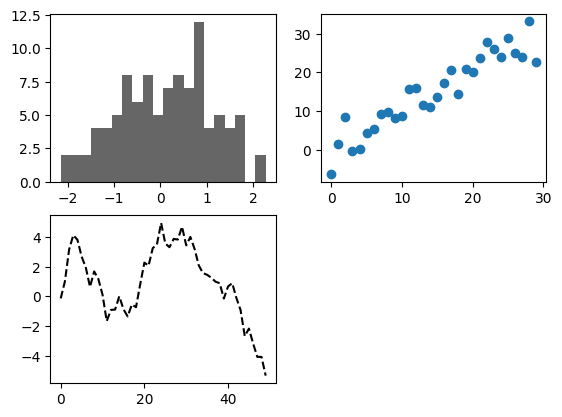

In [40]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed");

# notice the output like "[<matplotlib.lines.Line2D at 0x7336df8c7750>]"
# matplotlib returns objects that reference the plot subcomponent that was just added.
# put a semicolon at the end of the line to supress the output

# the objects returned by fig.add_subplot here are AxesSubplot objects,
# KEY POINTS: 
    # each subplot is a separate AxesSubplot object
    # we can call methods like .plot(), .set_title(), etc on each one individually

    # This allows you to:
        # create multiple independent plots in one figure
        # customize each subplot separately
        # keep your code organized


ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.6);
# the style option alpha sets the transparency of the overlain plot
# bins is the total number of bars
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

<Axes: >

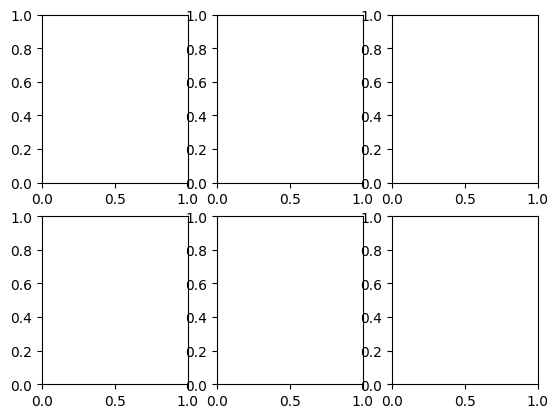

In [41]:
# plt.subplots() is a convenient way to create a grid of subplot, it returns
    # a figure object
    # an array of Axes object arranged in the specified grid

# Advantages:
    # no need to manually use fig.add_subplot() repeatedly
    # easy to loop over plots
    # better layout control
fig, axes = plt.subplots(2,3)
axes


#### `matplotlib.pyplot.subplots()` — Options List


| Option              | Default | Description |
|---------------------|---------|-------------|
| `nrows`             | 1       | Number of rows of subplots. |
| `ncols`             | 1       | Number of columns of subplots. |
| `sharex`            | False   | Share the x-axis across subplots (`True`, `'col'`, `'row'`, or `'all'`). |
| `sharey`            | False   | Share the y-axis across subplots. |
| `squeeze`           | True    | If True, reduces the dimensionality of returned `axes`. Set to False to always return a 2D array. |
| `subplot_kw`        | None    | Dict with extra keyword arguments for each subplot (e.g., projection='3d'). |
| `gridspec_kw`       | None    | Dict with options for fine-tuning the grid layout. |
| `figsize`           | None    | Tuple (width, height) in inches. E.g., `figsize=(10, 5)` |
| `dpi`               | None    | Dots per inch (resolution) of the figure. |
| `facecolor`         | None    | Background color of the figure. |
| `edgecolor`         | None    | Edge color of the figure. |
| `constrained_layout`| False   | Automatically adjust subplots to fit nicely in the figure area. (Alternative to `tight_layout()`.) |


### [ Adjusting the spacing around subplots ]
-if you resize the plot either programmatically or manually using the GUI window, the plot will dynamically adjust itself. - You can change the spacing using the subplots_adjust method on Figure objects
- `subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)`
- `wspace` controls the width space between columns of subplots (horizontal spacing)
- `hspace` controls the height space between rows of subplots (vertical spacing)

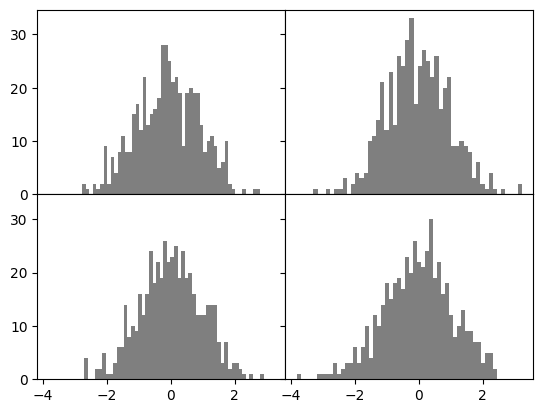

In [42]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50, color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

# notice that the axis labels overlap.
# matplotlib doesn't check whether the labels overlap, so in a case like this we need to fix the labels yourself by specifying explicit tick locations and tick labels

## [ Colors, Markers, and Line Styles ]

1. **Colors**

You can specify colors in many ways:
- **Named colors**: `"red"`, `"blue"`, `"green"`, etc.
- **Single-letter codes**: `'r'`, `'g'`, `'b'`, `'k'` (black), `'y'` (yellow), etc.
- **Hex codes**: `"#FF5733"`
- **RGB tuples**: `(0.1, 0.2, 0.5)` (values between 0 and 1)

2. **Markers**

Markers show **individual data points** on a line.

| Symbol | Marker     |
|--------|------------|
| `'o'`  | Circle     |
| `'s'`  | Square     |
| `'^'`  | Triangle up|
| `'v'`  | Triangle down |
| `'D'`  | Diamond    |
| `'x'`  | X marker   |
| `'+'`  | Plus       |

3. **Line Styles**

| Symbol | Line Style     |
|--------|----------------|
| `'-'`  | Solid line     |
| `'--'` | Dashed line    |
| `'-.'` | Dash-dot line  |
| `':'`  | Dotted line    |

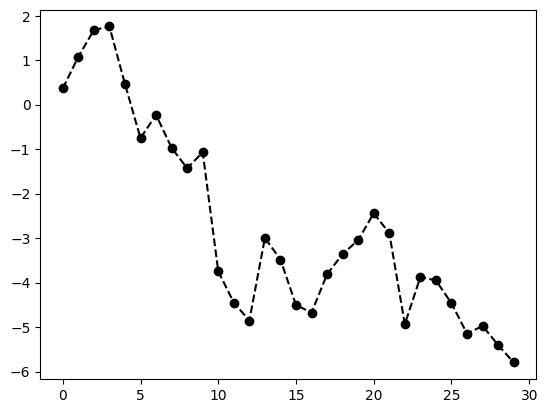

In [48]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black", linestyle="dashed", marker="o");


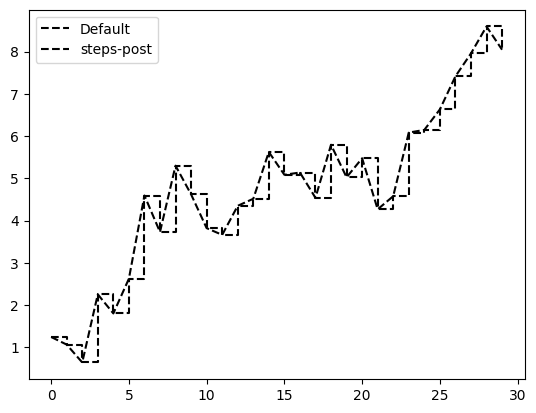

In [49]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()

ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed", drawstyle="steps-post", label="steps-post");
ax.legend()

## [ Ticks, Labels, and Legends ]